# Sales Prediction Analysis

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/INTERNSHIP/OASIS INFOBYTE/DATA SCIENCE/Assignment 3/Advertising.csv ")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4


In [4]:
# copying the data--
data.copy()
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
# data analysis--
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
print(data.dtypes)

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


In [10]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
# checking the missing values--
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
data.shape

(200, 5)

In [13]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# Data Preprocessing

In [14]:
data.drop("Unnamed: 0",axis=1,inplace=True)

# Exploratory Data Analysis

<Axes: >

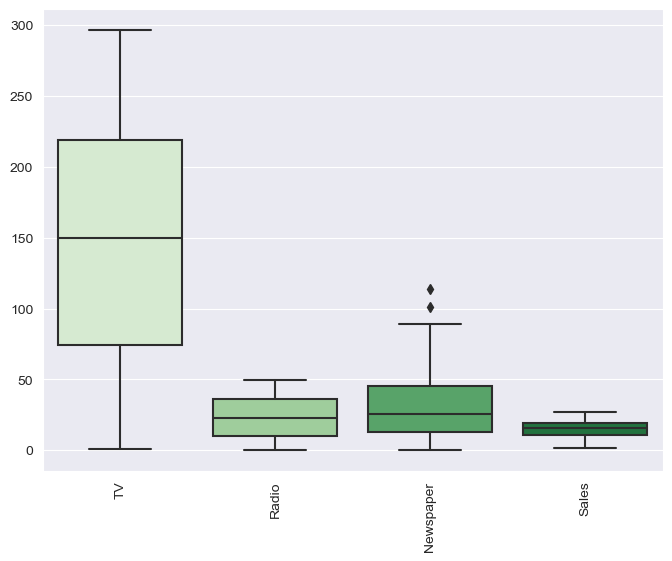

In [14]:
# checking the outliers--
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=data.loc[:, ['TV', 'Radio', 'Newspaper', 'Sales']],palette="Greens")

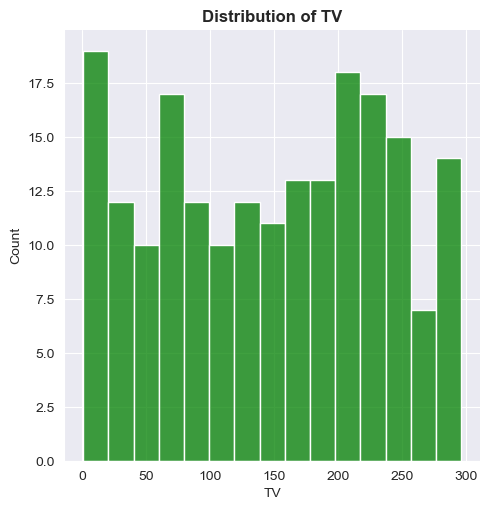

In [15]:
sns.displot(x=data["TV"],bins=15,color="green")
data["TV"].mean()
plt.title("Distribution of TV",fontweight="bold")
plt.show()

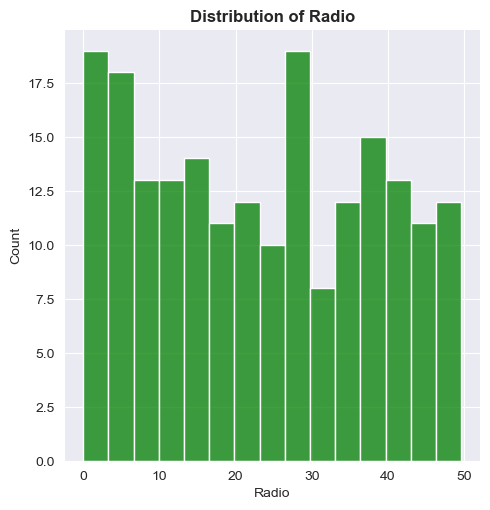

In [16]:
sns.displot(x=data["Radio"],bins=15,color="green")
data["Radio"].mean()
plt.title("Distribution of Radio",fontweight="bold")
plt.show()

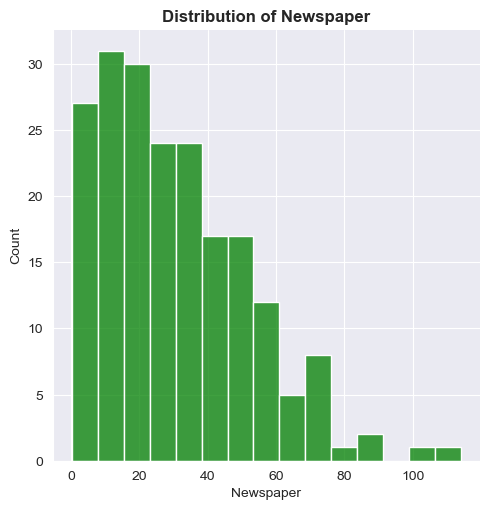

In [17]:
sns.displot(x=data["Newspaper"],bins=15,color="green")
data["Newspaper"].mean()
plt.title("Distribution of Newspaper",fontweight="bold")
plt.show()

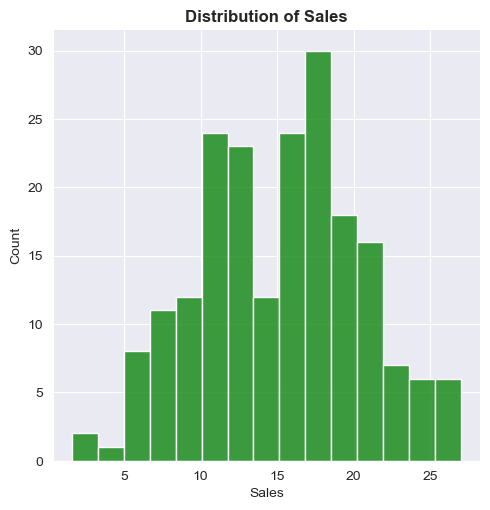

In [18]:
sns.displot(x=data["Sales"],bins=15,color="green")
data["Sales"].mean()
plt.title("Distribution of Sales",fontweight="bold")
plt.show()

<Axes: xlabel='TV', ylabel='count'>

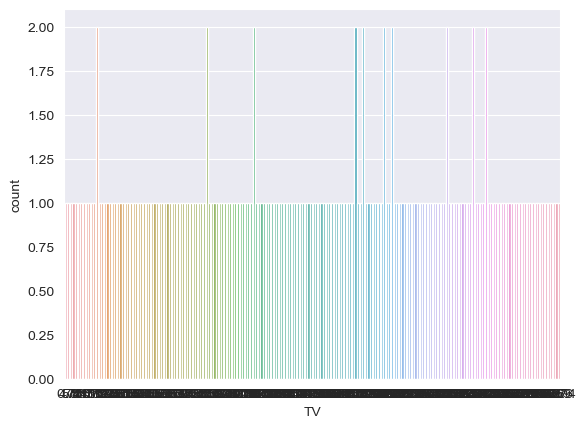

In [19]:
sns.countplot(x='TV', data=data)

<Axes: xlabel='Radio', ylabel='count'>

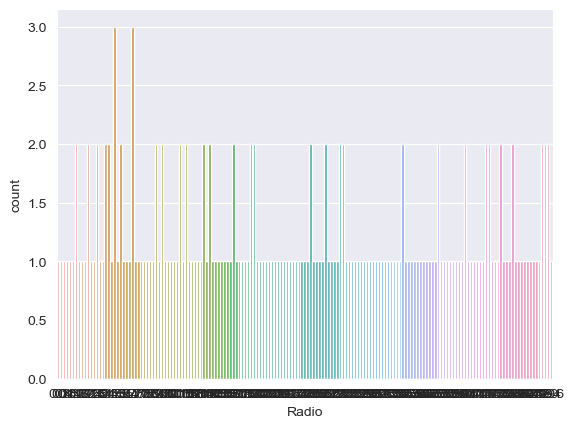

In [20]:
sns.countplot(x='Radio', data=data)

<Axes: xlabel='Newspaper', ylabel='count'>

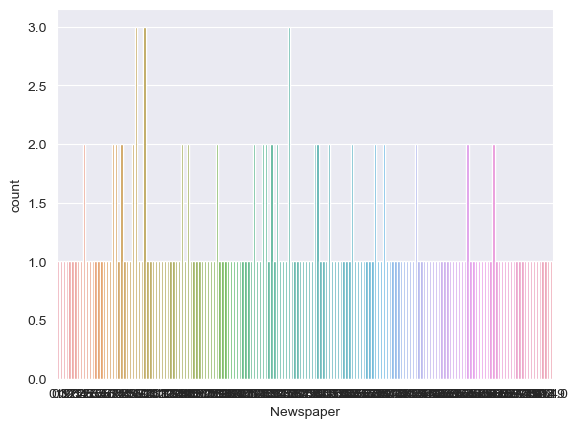

In [21]:
sns.countplot(x='Newspaper', data=data)

<Axes: xlabel='Sales', ylabel='count'>

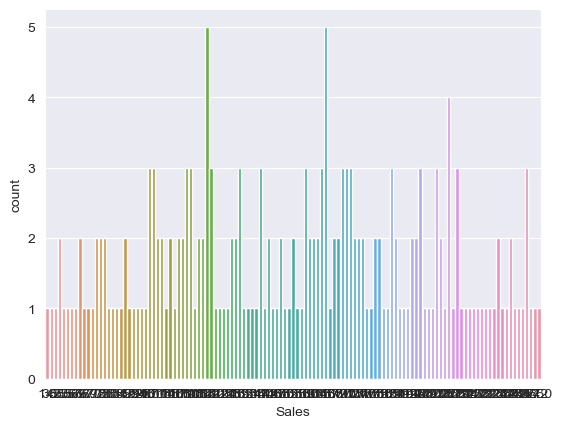

In [22]:
sns.countplot(x='Sales', data=data)

<Axes: xlabel='TV', ylabel='Density'>

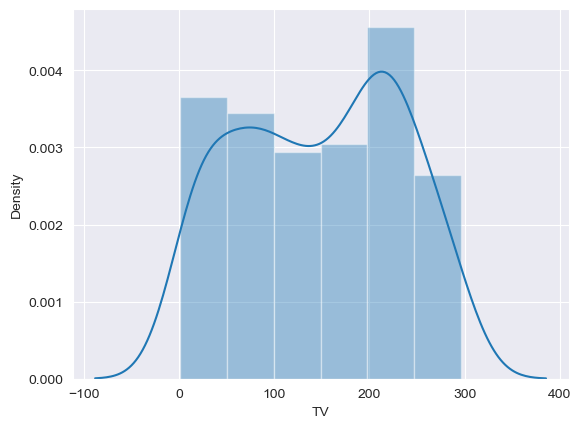

In [23]:
sns.distplot(data['TV'])

<Axes: xlabel='Radio', ylabel='Density'>

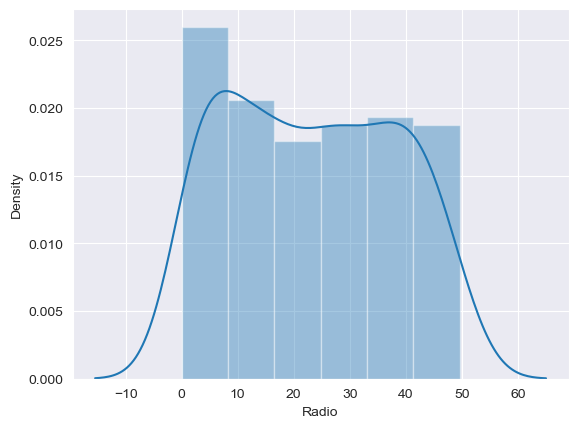

In [24]:
sns.distplot(data['Radio'])

<Axes: xlabel='Newspaper', ylabel='Density'>

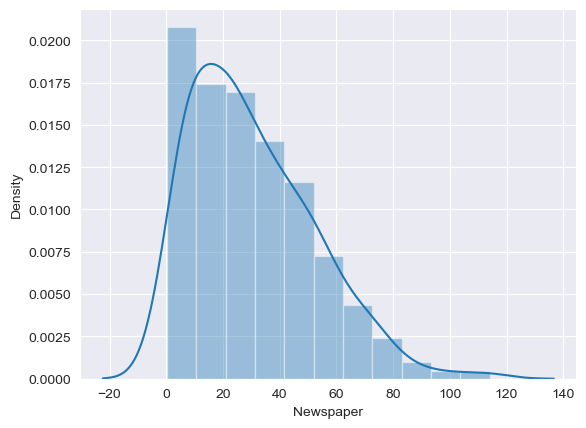

In [25]:
sns.distplot(data['Newspaper'])

<Axes: xlabel='Sales', ylabel='Density'>

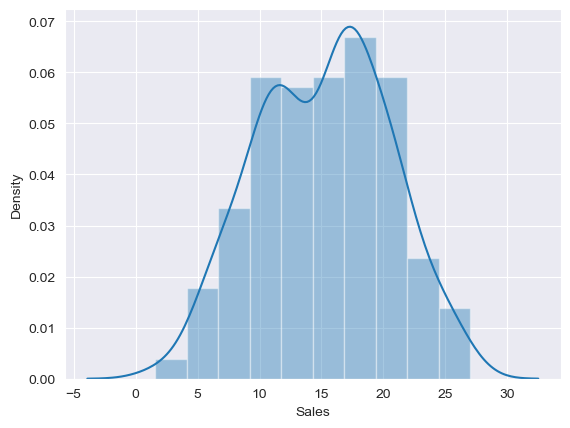

In [26]:
sns.distplot(data['Sales'])

TV              Axes(0.125,0.11;0.168478x0.77)
Radio        Axes(0.327174,0.11;0.168478x0.77)
Newspaper    Axes(0.529348,0.11;0.168478x0.77)
Sales        Axes(0.731522,0.11;0.168478x0.77)
dtype: object

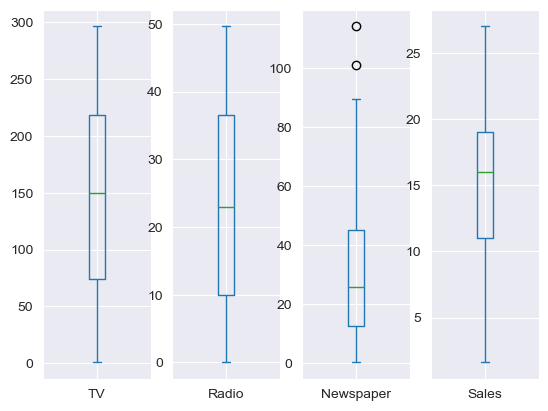

In [51]:
data.plot(kind ='box',subplots = True, layout =(1,4),sharex = False)

Text(0.5, 1.0, 'TV v/s Sales')

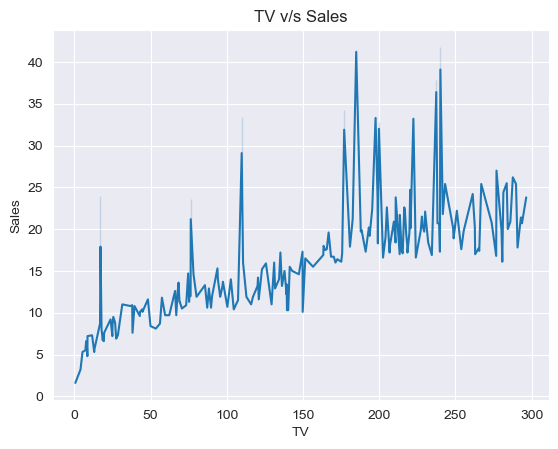

In [31]:
sns.lineplot(x="TV",y="Sales",data=data,estimator="sum",palette='hot')
plt.title("TV v/s Sales")

Text(0.5, 1.0, 'Radio v/s Sales')

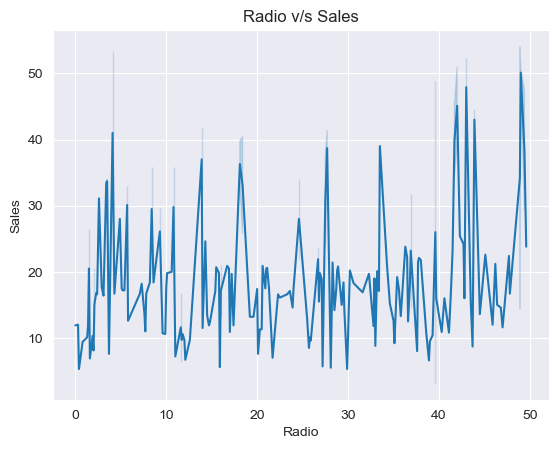

In [33]:
sns.lineplot(x="Radio",y="Sales",data=data,estimator="sum",palette='hot')
plt.title("Radio v/s Sales")

Text(0.5, 1.0, 'Newspaper v/s Sales')

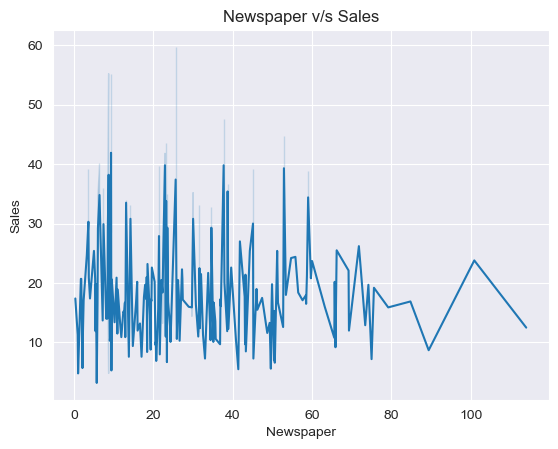

In [34]:
sns.lineplot(x="Newspaper",y="Sales",data=data,estimator="sum",palette='hot')
plt.title("Newspaper v/s Sales")

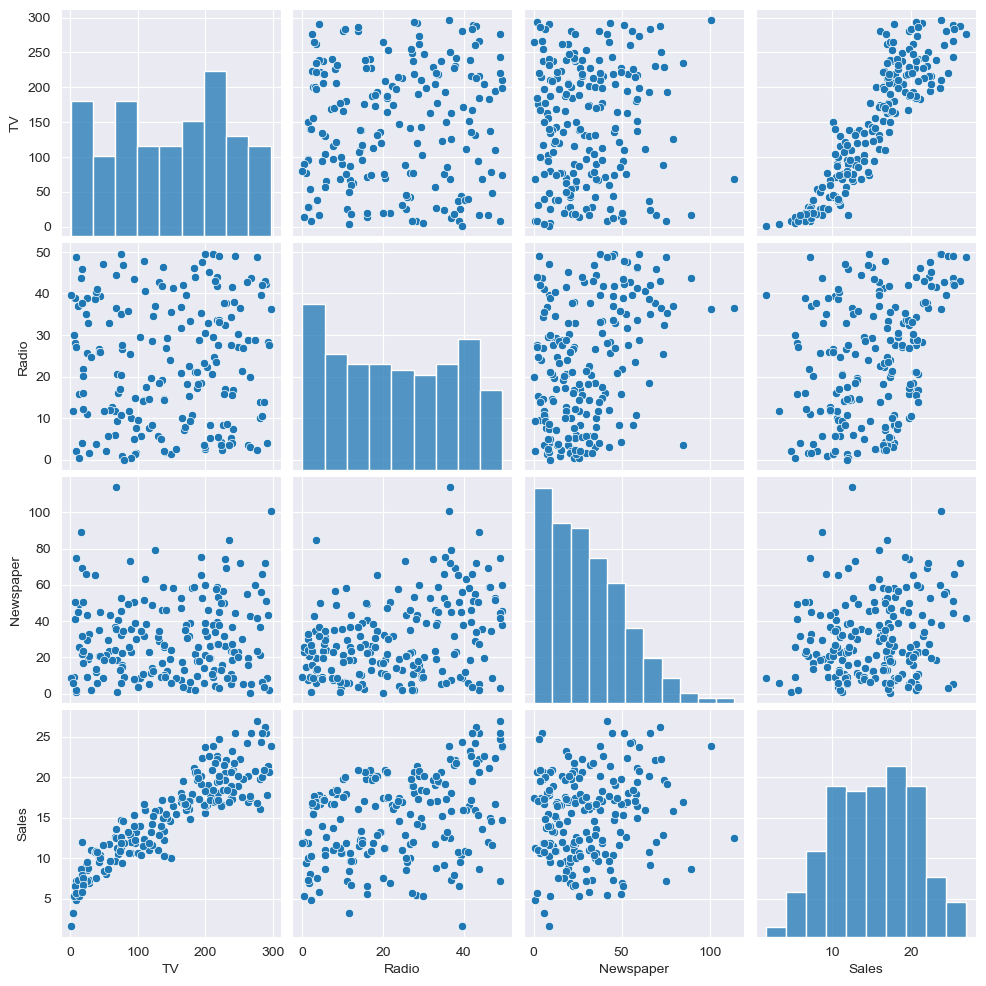

In [35]:
sns.pairplot(data)

<Axes: >

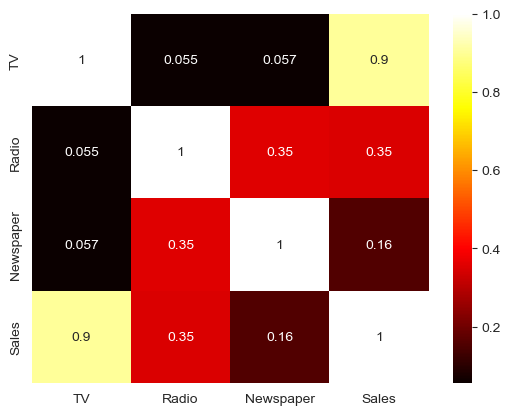

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='hot')

# Model Building

In [37]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [38]:
# sampling of data--
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return  X_train,X_test,y_train,y_test

In [39]:
# calling the train_test function--
X_train,X_test,y_train,y_test=train_test(X,y)

(160, 3)
(160,)
(40, 3)
(40,)


# Linear Regression

In [40]:
# defining--
def modelling1(X_train,y_train,X_test):
    model1=LinearRegression()
    model1_train=model1.fit(X_train,y_train)
    print("Model 1 training completed.")
    pred1=model1_train.predict(X_test)
    return pred1

In [41]:
# calling the model function--
pred1=modelling1(X_train,y_train,X_test)
pred1

Model 1 training completed.


array([15.40148707, 13.17751151, 12.83701542, 18.9766732 , 13.38841954,
       19.29317292, 10.45250245, 13.35120418,  9.07198142,  5.60984467,
       19.22019331, 22.09496709, 21.19013127, 19.72920229,  7.91677547,
        6.16700114,  9.29873033, 10.3894109 , 18.96222711,  9.46841405,
       22.88081454, 25.0323946 ,  7.08669623, 11.22799849, 20.27650437,
       21.90163356, 16.03292049, 10.11928853, 10.81565048, 18.20721048,
       11.29680852, 18.12743619, 21.66230749, 12.65732936, 15.02472839,
       16.98841377, 22.4487383 , 25.11052655,  8.72965159, 21.43684704])

In [42]:
r2score_LR=(round(r2_score(y_test,pred1)*100,2))
print('r2score:',r2score_LR)

r2score: 90.87


In [43]:
rmse = m.sqrt(mean_squared_error(y_test,pred1))
print('RMSE:',rmse)

RMSE: 1.7395046663638996


In [44]:
mae=mean_absolute_error(y_test,pred1)
print('MAE:', mae)

MAE: 1.2825361296036228


# KNN Regression

In [52]:
# defining--
def modelling2(X_train,y_train,X_test):
    model2=KNeighborsRegressor()
    model2_train=model2.fit(X_train,y_train)
    print("Model 2 training completed.")
    pred2=model2_train.predict(X_test)
    return pred2

In [53]:
# calling the model function--
pred2=modelling2(X_train,y_train,X_test)
pred2

Model 2 training completed.


array([18.34, 13.92, 11.54, 17.96, 13.06, 18.96,  9.6 , 12.36, 11.86,
        6.78, 20.92, 18.78, 18.5 , 17.88,  7.18,  4.8 ,  8.2 , 10.78,
       18.52, 11.14, 24.18, 24.18,  6.78, 12.6 , 19.16, 20.54, 17.58,
        9.9 , 11.88, 17.82, 10.58, 17.62, 18.56, 13.28, 14.06, 18.04,
       23.38, 25.3 ,  8.84, 21.86])

In [54]:
r2score_KNN=(round(r2_score(y_test,pred2)*100,2))
print('r2score:',r2score_KNN)

r2score: 91.23


In [55]:
rmse = m.sqrt(mean_squared_error(y_test,pred2))
print('RMSE:',rmse)

RMSE: 1.7047668462285392


In [56]:
mae=mean_absolute_error(y_test,pred2)
print('MAE:', mae)

MAE: 1.4165000000000003


# Linear Support Vector Regression

In [57]:
# defining--
def modelling3(X_train,y_train,X_test):
    model3=LinearSVR()
    model3_train=model3.fit(X_train,y_train)
    print("Model 3 training completed.")
    pred3=model3_train.predict(X_test)
    return pred3

In [58]:
# calling the model function--
pred3=modelling3(X_train,y_train,X_test)
pred3

Model 3 training completed.


array([14.02677723, 11.95675972, 11.84014212, 17.46562304, 12.3928604 ,
       17.79336807, 10.06106172, 12.26704075,  8.17474024,  5.03103607,
       17.94537854, 20.36430468, 19.364104  , 18.00871128,  7.31578691,
        5.60392437,  8.84763911,  9.5934209 , 17.45116033,  8.58827567,
       21.18960324, 23.33010256,  6.49259597, 10.2067493 , 18.85229815,
       20.29669255, 14.57321151,  9.49926899,  9.90541578, 16.78253589,
       10.5485745 , 16.83804757, 19.87133323, 11.45014382, 13.94851963,
       15.6117851 , 20.90055438, 23.39798141,  7.97787669, 20.02212485])

In [59]:
r2score_LSV1=(round(r2_score(y_test,pred3)*100,2))
print('r2score:',r2score_LSV1)

r2score: 91.12


In [60]:
rmse = m.sqrt(mean_squared_error(y_test,pred3))
print('RMSE:',rmse)

RMSE: 1.7155916379269671


In [61]:
mae=mean_absolute_error(y_test,pred3)
print('MAE:', mae)

MAE: 1.2996706133019227


# Decision Tree Regression

In [62]:
# defining--
def modelling4(X_train,y_train,X_test):
    model4=DecisionTreeRegressor()
    model4_train=model4.fit(X_train,y_train)
    print("Model 4 training completed.")
    pred4=model4_train.predict(X_test)
    return pred4

In [63]:
# calling the model function--
pred4=modelling4(X_train,y_train,X_test)
pred4

Model 4 training completed.


array([17.6, 15.5, 12.9, 20.5, 11.5, 17.4,  1.6, 14.2, 11.9,  5.6, 18.3,
       19.8, 20. , 16.8,  6.6,  5.7,  1.6, 12.3, 17.3, 10.9, 19.7, 24.4,
        6.6, 11.9, 19. , 22.1, 16.4,  8. ,  9.7, 16.6, 10.1, 21.2, 20. ,
       13.4, 14.2, 20.2, 21.5, 25.4,  8.1, 22.6])

In [64]:
r2score_DT=(round(r2_score(y_test,pred4)*100,2))
print('r2score:',r2score_DT)

r2score: 87.7


In [65]:
rmse = m.sqrt(mean_squared_error(y_test,pred4))
print('RMSE:',rmse)

RMSE: 2.0186010006933017


In [66]:
mae=mean_absolute_error(y_test,pred4)
print('MAE:', mae)

MAE: 1.4425


# Random Forest Regression

In [67]:
# defining--
def modelling5(X_train,y_train,X_test):
    model5=RandomForestRegressor()
    model5_train=model5.fit(X_train,y_train)
    print("Model 5 training completed.")
    pred5=model5_train.predict(X_test)
    return pred5

In [68]:
# calling the model function--
pred5=modelling5(X_train,y_train,X_test)
pred5

Model 5 training completed.


array([17.256, 15.556, 12.232, 19.968, 13.743, 18.59 ,  7.113, 12.329,
       11.94 ,  5.878, 19.02 , 19.507, 19.548, 16.966,  7.014,  4.996,
        5.951, 11.497, 17.812, 11.621, 19.891, 21.763,  6.821, 12.326,
       18.999, 22.712, 16.638,  8.433, 11.401, 17.742, 10.124, 19.843,
       20.052, 12.617, 14.109, 19.647, 21.084, 25.139,  9.599, 23.179])

In [69]:
r2score_RF=(round(r2_score(y_test,pred5)*100,2))
print('r2score:',r2score_RF)

r2score: 93.02


In [70]:
rmse = m.sqrt(mean_squared_error(y_test,pred5))
print('RMSE:',rmse)

RMSE: 1.5210671911523166


In [71]:
mae=mean_absolute_error(y_test,pred5)
print('MAE:', mae)

MAE: 1.088449999999999


# Gradient Boosting Regression

In [72]:
# defining--
def modelling6(X_train,y_train,X_test):
    model6=GradientBoostingRegressor()
    model6_train=model6.fit(X_train,y_train)
    print("Model 6 training completed.")
    pred6=model6_train.predict(X_test)
    return pred6

In [73]:
# calling the model function--
pred6=modelling6(X_train,y_train,X_test)
pred6

Model 6 training completed.


array([17.12545416, 15.33355708, 12.29319796, 19.65099943, 13.6315705 ,
       18.8343545 ,  9.11957151, 12.5350491 , 11.03566484,  5.58678976,
       19.78427201, 19.38444861, 20.10470183, 17.00596274,  7.33701708,
        5.03302394,  5.04473426, 11.11743743, 18.48064332, 11.25425961,
       19.87276033, 22.27351386,  7.11357551, 12.60380938, 19.1228204 ,
       21.95057289, 16.50786583,  8.8302413 , 11.44401295, 17.90370107,
       10.4712604 , 19.21801293, 20.47867573, 11.93754749, 13.63423515,
       19.12639769, 20.7355895 , 25.70590615,  9.30761646, 23.08784813])

In [74]:
r2score_GB=(round(r2_score(y_test,pred6)*100,2))
print('r2score:',r2score_GB)

r2score: 93.1


In [75]:
rmse = m.sqrt(mean_squared_error(y_test,pred6))
print('RMSE:',rmse)

RMSE: 1.512394567473237


In [76]:
mae=mean_absolute_error(y_test,pred6)
print('MAE:', mae)

MAE: 1.1043354623592183


In [83]:
details = {
    'Model' : ['Linear Regression','KNN Regression','Linear Support Vector Regression','Decision Tree Regression',
               'Random Forest Regression','Gradient Boosting Regression'],
    'Accuracy %' : [r2score_LR,r2score_KNN,r2score_LSV1,r2score_DT,r2score_RF,r2score_GB]}
df = pd.DataFrame(details)
df

,Model,Accuracy %
0,Linear Regression,90.87
1,KNN Regression,91.23
2,Linear Support Vector Regression,91.12
3,Decision Tree Regression,87.70
4,Random Forest Regression,93.02
5,Gradient Boosting Regression,93.10


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Linear Support Vector Regression'),
  Text(3, 0, 'Decision Tree Regression'),
  Text(4, 0, 'Random Forest Regression'),
  Text(5, 0, 'Gradient Boosting Regression')])

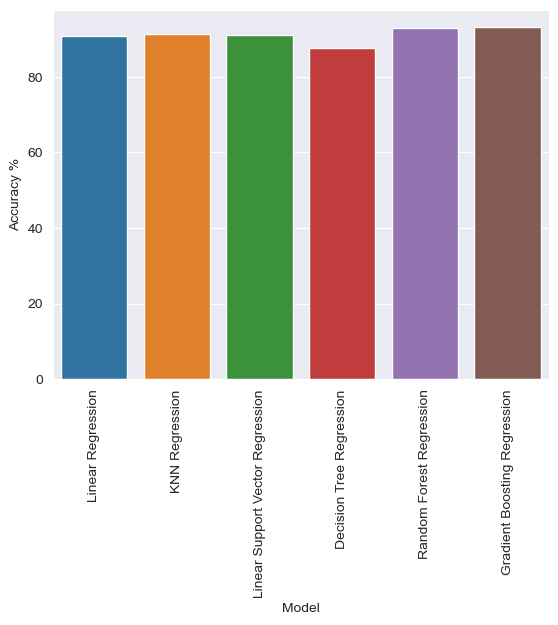

In [89]:
sns.barplot( x = df['Model'],y = df['Accuracy %'])
plt.xticks(rotation=90,fontsize="medium")